In [1]:
# pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=09c3da92867065fba5cb85c6965875d0619792e964baa11a221d97a8ed797ab5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [7]:
#first importing all the necessary libraries that we need
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from keras.layers import Dense,LSTM
import yfinance as yf
plt.style.use('fivethirtyeight')


AttributeError: module 'tensorflow.python.training.experimental.mixed_precision' has no attribute '_register_wrapper_optimizer_cls'

In [3]:
# Get the stock quote i.e the stock data
# df=web.DataReader('AAPL',data_source="yahoo",start='2014-01-01',end='2021-07-31')
df = yf.download('AAPL', start='2015-01-01',end='2021-07-31')
# df = yf.download(stock, period='5y')
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2015-01-02   27.847500   27.860001  ...   24.782110  212818400
2015-01-05   27.072500   27.162500  ...   24.083958  257142000
2015-01-06   26.635000   26.857500  ...   24.086227  263188400
2015-01-07   26.799999   27.049999  ...   24.423975  160423600
2015-01-08   27.307501   28.037500  ...   25.362394  237458000
...                ...         ...  ...         ...        ...
2021-07-26  148.270004  149.830002  ...  148.767120   72434100
2021-07-27  149.119995  149.210007  ...  146.550430  104818600
2021-07-28  144.809998  146.970001  ...  144.763107  118931200
2021-07-29  144.690002  146.550003  ...  145.422119   56699500
2021-07-30  144.380005  146.330002  ...  145.641785   70382000

[1656 rows x 6 columns]


In [4]:
# Exploring the data
print(df.head())
print(df.tail())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.782110  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  24.083958  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  24.086227  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.423975  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.362394  237458000
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2021-07-26  148.270004  149.830002  ...  148.767120   72434100
2021-07-27  149.119995  149.210007  ...  146.550430  104818600
2021-07-28  144.809998  146.970001  ...  144.763107  118931200
2021-07-29  144.690002  146.550003  ...  145.422119   56699500
2021-07-30  144.380005  146.330002  ...  145.641785   70382000

[5 rows x 6 columns

In [5]:
# The no. of rows and columns in the dataset
df.shape

(1656, 6)

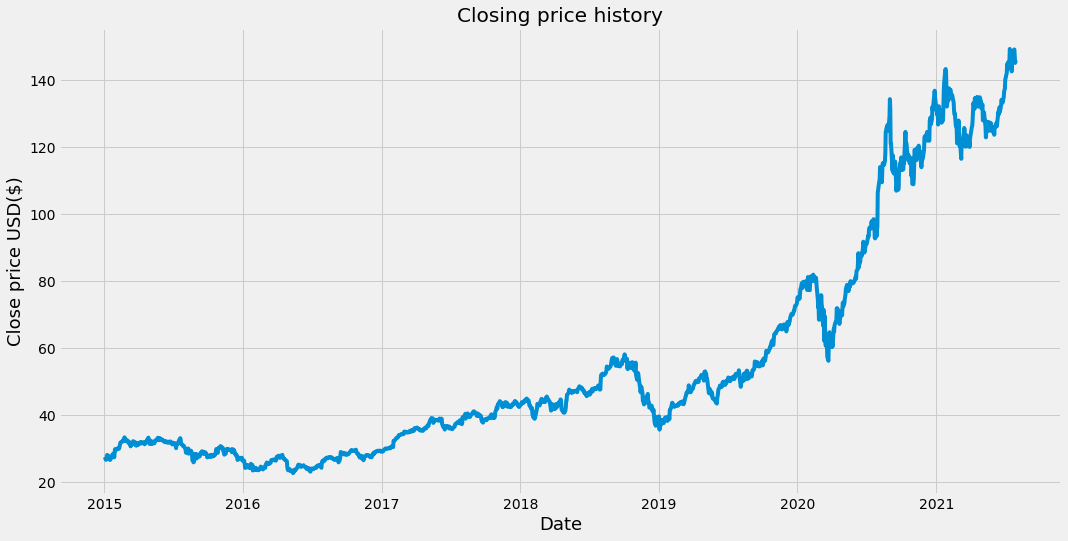

In [6]:
# Visualing the data

plt.figure(figsize=(16,8))
plt.title("Closing price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.show()

In [7]:
# creating a new dataframe with only the "Close" column
data=df.filter(['Close'])
dataset=data.values
dataset

array([[ 27.33250046],
       [ 26.5625    ],
       [ 26.56500053],
       ...,
       [144.97999573],
       [145.63999939],
       [145.86000061]])

In [8]:
# Selecting the no. of rows to train the model on
training_size=math.ceil(len(dataset)*0.8)
training_size

1325

In [9]:
#scaling the data 
# It will make our data in the range of [0,1]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.03751038],
       [0.03142655],
       [0.03144631],
       ...,
       [0.96705252],
       [0.97226726],
       [0.9740055 ]])

In [10]:
#creating the training dataset i.e, scaled training dataset
train_data=scaled_data[:training_size,:]

#rest data will be our testing dataset
test_data=scaled_data[training_size-60:,:]

train_data.shape,test_data.shape

((1325, 1), (391, 1))

In [11]:
# Split the data into x_train and y_train datasets
# i.e, independent and dependent training features
x_train=[]
y_train=[]
for i in range(60,training_size):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if(i<=61):
        print(x_train)
        print(y_train)
        print()

[array([0.03751038, 0.03142655, 0.03144631, 0.03438945, 0.04256707,
       0.04280411, 0.03735236, 0.03926837, 0.03843876, 0.03255245,
       0.03091297, 0.03630547, 0.03794494, 0.04357446, 0.04472012,
       0.04495714, 0.03713508, 0.04932249, 0.05641371, 0.05297675,
       0.05588038, 0.0559199 , 0.05771738, 0.058468  , 0.05647297,
       0.05803343, 0.06257654, 0.06822582, 0.07134675, 0.07257142,
       0.07405287, 0.07581086, 0.07527753, 0.07735157, 0.08426501,
       0.08262554, 0.07594911, 0.07916881, 0.0752973 , 0.0765417 ,
       0.07707503, 0.0754553 , 0.07124799, 0.07162328, 0.07268993,
       0.06749498, 0.06301111, 0.06737645, 0.06567772, 0.06836409,
       0.07249241, 0.07531704, 0.07340103, 0.0702406 , 0.0728282 ,
       0.07180107, 0.06526291, 0.06696165, 0.06500613, 0.07116898])]
[0.06733695208916057]

[array([0.03751038, 0.03142655, 0.03144631, 0.03438945, 0.04256707,
       0.04280411, 0.03735236, 0.03926837, 0.03843876, 0.03255245,
       0.03091297, 0.03630547, 0.03

In [12]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
#reshape the data to 3-dimensional since our model requires 3d data values
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1265, 60, 1)

In [14]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
# Train the model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1265/1265 [==============================] - 45s 21ms/step - loss: 0.0015
Epoch 2/10
1265/1265 [==============================] - 27s 21ms/step - loss: 2.3976e-04
Epoch 3/10
1265/1265 [==============================] - 27s 22ms/step - loss: 1.6412e-04
Epoch 4/10
1265/1265 [==============================] - 27s 21ms/step - loss: 1.6530e-04
Epoch 5/10
1265/1265 [==============================] - 27s 21ms/step - loss: 1.2545e-04
Epoch 6/10
1265/1265 [==============================] - 27s 21ms/step - loss: 1.3078e-04
Epoch 7/10
1265/1265 [==============================] - 27s 22ms/step - loss: 1.9733e-04
Epoch 8/10
1265/1265 [==============================] - 27s 22ms/step - loss: 1.1113e-04
Epoch 9/10
1265/1265 [==============================] - 27s 22ms/step - loss: 1.0068e-04
Epoch 10/10
1265/1265 [==============================] - 27s 21ms/step - loss: 1.2191e-04


In [17]:
#create the testing dataset
x_test=[]
# y_test=dataset[training_]
y_test=dataset[training_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [18]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshaping the data to be 3-d
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(331, 60, 1)

In [19]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [20]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse
# rmse=np.sqrt(((predictions-y_test)**2),mean())


2.392657150084812

In [21]:
#plot the data
train=data[:training_size]
valid=data[training_size:]
valid['Predictions']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


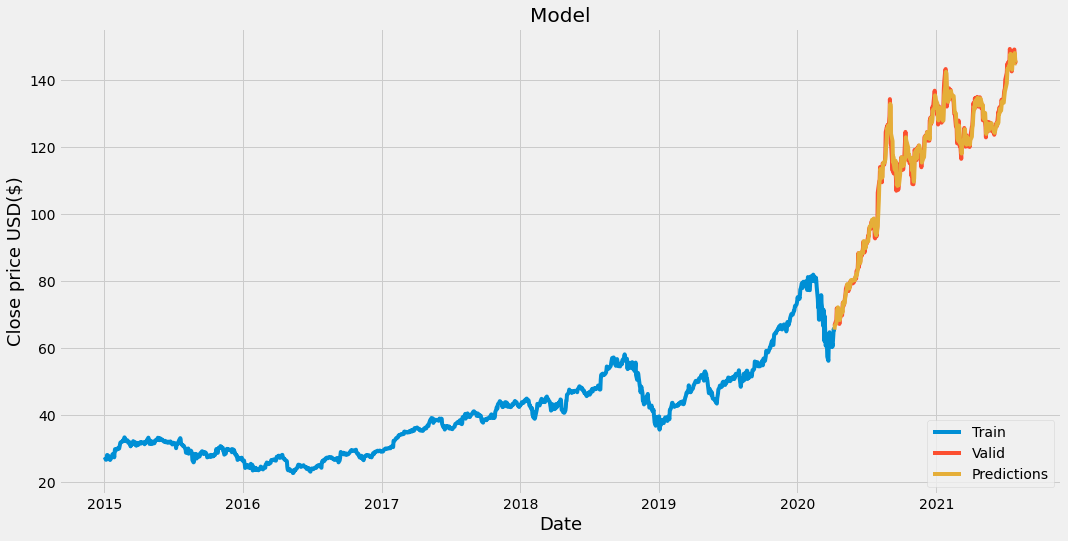

In [22]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [23]:
#the numerical data
valid

,Close,Predictions
Date,,
2020-04-08,66.517502,65.380981
2020-04-09,66.997498,66.605652
2020-04-13,68.312500,67.285942
2020-04-14,71.762497,68.440567
2020-04-15,71.107498,71.373337
...,...,...
2021-07-26,148.990005,147.248093
2021-07-27,146.770004,147.924911
2021-07-28,144.979996,146.494186


In [24]:
# Now lets see our model is working properly by predicting the closing stock of one day ahead
#get the quote
# apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2021-06-25',end='2021-07-01')
apple_quote=yf.download('AAPL',start='2021-07-30',end='2021-08-12')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
print(new_df)

[*********************100%***********************]  1 of 1 completed
                 Close
Date                  
2021-07-30  145.860001
2021-08-02  145.520004
2021-08-03  147.360001
2021-08-04  146.949997
2021-08-05  147.059998
2021-08-06  146.139999
2021-08-09  146.089996
2021-08-10  145.600006
2021-08-11  145.860001


In [25]:
#now taking the last 60 day closing price values and converting the dataframe
# to an ARRAY
# last_60=test_data[-60:]
# last_60

In [26]:
# now scaling the data to be between 0 and 1
# last_60_scaled=scaler.transform(last_60)
last_60_scaled=test_data[-60:]
last_60_scaled

array([[0.84664015],
       [0.85035367],
       [0.82380598],
       [0.81637901],
       [0.79156956],
       [0.80895197],
       [0.82854661],
       [0.81922334],
       [0.80800382],
       [0.80673968],
       [0.82744047],
       [0.81258646],
       [0.82578125],
       [0.82420106],
       [0.82380598],
       [0.81140129],
       [0.80610758],
       [0.80350021],
       [0.80966304],
       [0.79765343],
       [0.81622095],
       [0.81629998],
       [0.82293685],
       [0.82601827],
       [0.8179592 ],
       [0.82775652],
       [0.85248687],
       [0.84585   ],
       [0.8498795 ],
       [0.86283727],
       [0.85232894],
       [0.86686689],
       [0.88014065],
       [0.87792836],
       [0.8756371 ],
       [0.87326675],
       [0.88646154],
       [0.89870823],
       [0.90368595],
       [0.90613527],
       [0.92738919],
       [0.94366539],
       [0.96381317],
       [0.95330472],
       [0.96807969],
       [0.96326003],
       [0.97226726],
       [1.   

In [27]:
# Now creating a dataset of this last 60 day
X_test=[last_60_scaled]
#Converting it into numpy array
X_test=np.array(X_test)
#reshaping the array to be 3 dimensional
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [28]:
#Now calculating the predicted scale price
pred=model.predict(X_test)
print(pred)
#undoing the scaling
pred=scaler.inverse_transform(pred)
print(pred)

[[0.9679296]]
[[145.091]]


In [29]:
print(new_df)

                 Close
Date                  
2021-07-30  145.860001
2021-08-02  145.520004
2021-08-03  147.360001
2021-08-04  146.949997
2021-08-05  147.059998
2021-08-06  146.139999
2021-08-09  146.089996
2021-08-10  145.600006
2021-08-11  145.860001


In [30]:
# as we could see above after 30th july theres the 2nd August and it is giving 145.52 valid closing price 
# and we got 145.091 which is very close to the valid price, so our model's prediction is very close we can increase it more
# further if we increase the test data or increase the model epochs

In [31]:
# Now lets check if the predicted values match with the actual value or not
# apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-01-01',end='2021-01-04')
# apple_quote2

In [32]:
# apple_quote2['Close']
# as we can see the actual price is 129 which is very close to our predicted price 123

## Predicting next 10 days

In [33]:
len(test_data)

391

In [34]:
x_input=test_data[-60:].reshape(1,-1)
x_input.shape

(1, 60)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.846640151709008,
 0.8503536683997898,
 0.8238059784580588,
 0.8163790053569425,
 0.7915695624007218,
 0.8089519719753788,
 0.8285466136946206,
 0.8192233382745217,
 0.8080038208158874,
 0.8067396795503464,
 0.8274404674821044,
 0.8125864609994246,
 0.8257812481633301,
 0.8242010565112919,
 0.8238059784580588,
 0.8114012871201721,
 0.8061075787773522,
 0.8035002082990865,
 0.8096630401346617,
 0.7976534268500085,
 0.8162209500234702,
 0.8162999776902063,
 0.8229368549653034,
 0.8260182708830911,
 0.8179591970089807,
 0.8277565178686016,
 0.8524868728776386,
 0.8458499956025415,
 0.8498795023993727,
 0.8628372668435175,
 0.8523289381050613,
 0.866866894201244,
 0.8801406487514382,
 0.8779283563264059,
 0.8756370965150849,
 0.8732667487565801,
 0.8864615359204858,
 0.8987082322053476,
 0.9036859504421179,
 0.9061352655869112,
 0.9273891869053749,
 0.9436653899870681,
 0.9638131650930154,
 0.9533047157936642,
 0.9680796946096079,
 0.9632600317063099,
 0.9722672567399117,
 1.000000000000

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<10):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9679296]
61
1 day input [0.85035367 0.82380598 0.81637901 0.79156956 0.80895197 0.82854661
 0.81922334 0.80800382 0.80673968 0.82744047 0.81258646 0.82578125
 0.82420106 0.82380598 0.81140129 0.80610758 0.80350021 0.80966304
 0.79765343 0.81622095 0.81629998 0.82293685 0.82601827 0.8179592
 0.82775652 0.85248687 0.84585    0.8498795  0.86283727 0.85232894
 0.86686689 0.88014065 0.87792836 0.8756371  0.87326675 0.88646154
 0.89870823 0.90368595 0.90613527 0.92738919 0.94366539 0.96381317
 0.95330472 0.96807969 0.96326003 0.97226726 1.         0.99470629
 0.97819307 0.9470628  0.97629676 0.97037095 0.98143254 0.99533839
 0.99873592 0.98119551 0.96705252 0.97226726 0.9740055  0.9679296 ]
1 day output [[0.96407366]]
2 day input [0.82380598 0.81637901 0.79156956 0.80895197 0.82854661 0.81922334
 0.80800382 0.80673968 0.82744047 0.81258646 0.82578125 0.82420106
 0.82380598 0.81140129 0.80610758 0.80350021 0.80966304 0.79765343
 0.81622095 0.81629998 0.82293685 0.82601827 0.8179592  0.8277

In [37]:
lst_output=np.array(lst_output)
print(scaler.inverse_transform(lst_output),new_df)

[[145.0910041 ]
 [144.60297661]
 [144.09928051]
 [143.61173583]
 [143.14123273]
 [142.68701682]
 [142.24817531]
 [141.82397643]
 [141.41394492]
 [141.01780921]]                  Close
Date                  
2021-07-30  145.860001
2021-08-02  145.520004
2021-08-03  147.360001
2021-08-04  146.949997
2021-08-05  147.059998
2021-08-06  146.139999
2021-08-09  146.089996
2021-08-10  145.600006
2021-08-11  145.860001


In [38]:
day_new=np.arange(1,61)
day_pred=np.arange(61,69)

In [39]:
print(len(scaled_data),scaled_data)

1656 [[0.03751038]
 [0.03142655]
 [0.03144631]
 ...
 [0.96705252]
 [0.97226726]
 [0.9740055 ]]


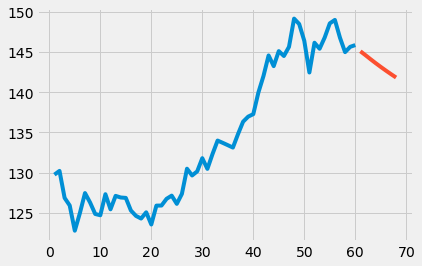

In [40]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[-60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output)[:-2])

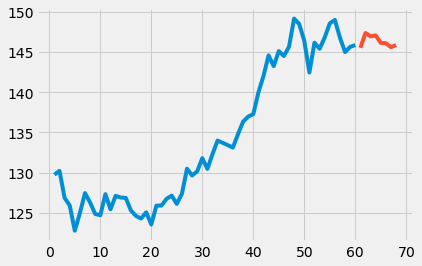

In [41]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[-60:]))
plt.plot(day_pred,new_df[1:])

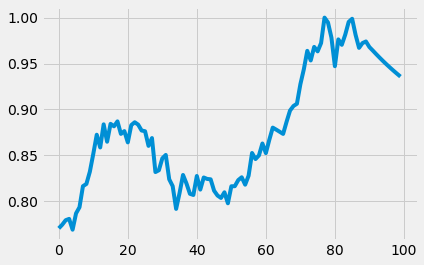

In [42]:
df3=scaled_data.tolist()
df3.extend(lst_output)
plt.plot(df3[-100:])

#to check our model thefollowing codes have been **written**


In [43]:
# apple_quote3=web.DataReader('AAPL',data_source='yahoo',start='2021-05-28',end='2021-06-30')
df4=yf.download('AAPL',period='5y')
print(df4)

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2016-08-15   27.035000   27.385000  ...   25.668697  103472800
2016-08-16   27.407499   27.557501  ...   25.645245  135177600
2016-08-17   27.275000   27.342501  ...   25.607737  101424000
2016-08-18   27.307501   27.400000  ...   25.574909   87938800
2016-08-19   27.192499   27.422501  ...   25.640558  101472400
...                ...         ...  ...         ...        ...
2021-08-09  146.199997  146.699997  ...  146.089996   48908700
2021-08-10  146.440002  147.710007  ...  145.600006   68922200
2021-08-11  146.050003  146.720001  ...  145.860001   48422100
2021-08-12  146.190002  149.050003  ...  148.889999   73779100
2021-08-13  148.970001  149.440002  ...  149.100006   59318800

[1259 rows x 6 columns]


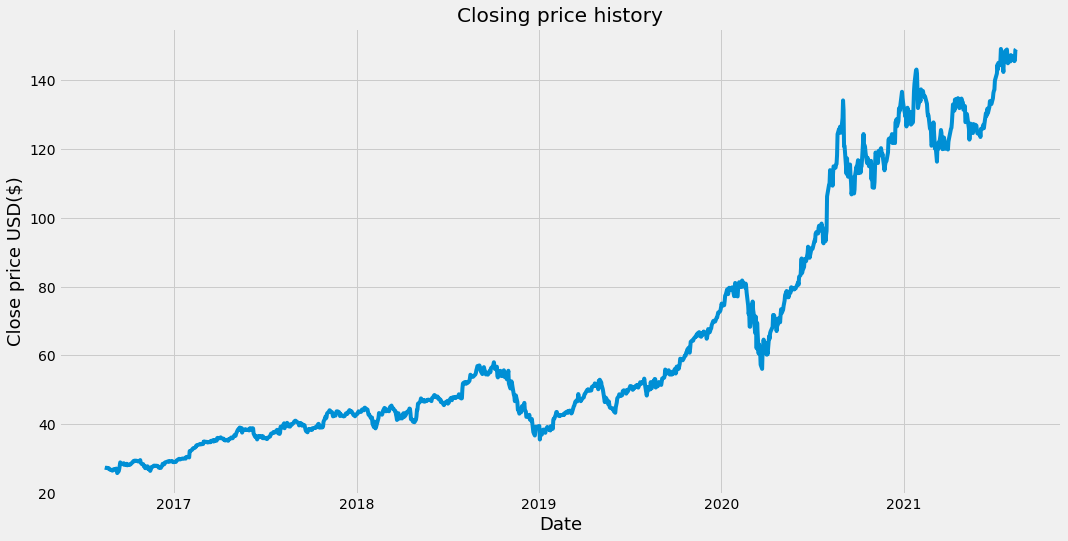

In [44]:
# Visualing the data

plt.figure(figsize=(16,8))
plt.title("Closing price history")
plt.plot(df4['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.show()

In [45]:
# creating a new dataframe with only the "Close" column
data=df4.filter(['Close'])
dataset=data.values
print(dataset)
#scaling the data 
# It will make our data in the range of [0,1]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
print(scaled_data)
train_data = scaled_data

[[ 27.37000084]
 [ 27.34499931]
 [ 27.30500031]
 ...
 [145.86000061]
 [148.88999939]
 [149.1000061 ]]
[[0.01286807]
 [0.01266541]
 [0.01234118]
 ...
 [0.97333177]
 [0.99789252]
 [0.99959481]]


In [46]:
x_train = []
y_train = []
for i in range(60, len(scaled_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])

# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [47]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1199/1199 [==============================] - 29s 22ms/step - loss: 0.0031
Epoch 2/10
1199/1199 [==============================] - 26s 22ms/step - loss: 0.0010
Epoch 3/10
1199/1199 [==============================] - 26s 22ms/step - loss: 0.0010
Epoch 4/10
1199/1199 [==============================] - 26s 22ms/step - loss: 5.8664e-04
Epoch 5/10
1199/1199 [==============================] - 26s 22ms/step - loss: 5.6108e-04
Epoch 6/10
1199/1199 [==============================] - 26s 22ms/step - loss: 5.6223e-04
Epoch 7/10
1199/1199 [==============================] - 26s 22ms/step - loss: 5.5751e-04
Epoch 8/10
1199/1199 [==============================] - 26s 22ms/step - loss: 3.2704e-04
Epoch 9/10
1199/1199 [==============================] - 26s 22ms/step - loss: 4.1687e-04
Epoch 10/10
1199/1199 [==============================] - 26s 22ms/step - loss: 3.7231e-04


In [48]:
x_input = scaled_data[-60:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<10):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0019294]
61
1 day input [0.80772898 0.82126576 0.81964461 0.81923929 0.80651309 0.80108218
 0.79840723 0.80472979 0.79240891 0.81145767 0.81153875 0.81834764
 0.82150893 0.81324097 0.82329223 0.84866355 0.84185466 0.8459886
 0.85928221 0.84850153 0.86341628 0.87703407 0.87476444 0.8724138
 0.86998201 0.88351879 0.8960829  0.90118963 0.90370243 0.92550722
 0.94220528 0.96287526 0.95209444 0.96725237 0.96230779 0.97154847
 1.         0.99456909 0.97762786 0.94569074 0.97568241 0.96960301
 0.9809513  0.99521757 0.99870316 0.98070813 0.96619857 0.97154847
 0.97333177 0.9705758  0.98549056 0.98216713 0.98305878 0.9756014
 0.97519608 0.97122429 0.97333177 0.99789252 0.99959481 1.0019294 ]
1 day output [[1.0040343]]
2 day input [0.82126576 0.81964461 0.81923929 0.80651309 0.80108218 0.79840723
 0.80472979 0.79240891 0.81145767 0.81153875 0.81834764 0.82150893
 0.81324097 0.82329223 0.84866355 0.84185466 0.8459886  0.85928221
 0.84850153 0.86341628 0.87703407 0.87476444 0.8724138  0.8699820

In [50]:
lst_output=np.array(lst_output)
print(scaler.inverse_transform(lst_output),df4[-10:])

[[149.38801943]
 [149.64769301]
 [149.8685707 ]
 [150.10522853]
 [150.35528402]
 [150.60748667]
 [150.85127717]
 [151.08064055]
 [151.29392966]
 [151.49210044]]                   Open        High  ...   Adj Close    Volume
Date                                ...                      
2021-08-02  146.360001  146.949997  ...  145.302307  62880000
2021-08-03  145.809998  148.039993  ...  147.139542  64786600
2021-08-04  147.270004  147.789993  ...  146.730164  56368300
2021-08-05  146.979996  147.839996  ...  146.839996  46397700
2021-08-06  146.350006  147.110001  ...  146.139999  54067400
2021-08-09  146.199997  146.699997  ...  146.089996  48908700
2021-08-10  146.440002  147.710007  ...  145.600006  68922200
2021-08-11  146.050003  146.720001  ...  145.860001  48422100
2021-08-12  146.190002  149.050003  ...  148.889999  73779100
2021-08-13  148.970001  149.440002  ...  149.100006  59318800

[10 rows x 6 columns]
